# Ambiguous map patterns from stratigraphy

### This notebook creates ambiguous map patterns from both onlap and truncated stratal geometries

In [1]:
# some imports, using verde to grid
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import verde as vd

In [2]:
%matplotlib inline

C:\Users\jrp4932\AppData\Local\Continuum\anaconda3\envs\strata\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Here we make some data with angular unconformity and onlap

In [4]:
NAMES = [
    "one",
    "two",
    "three",
    "four",
    "five",
    "six",
    "seven",
    "eight",
    "nine",
    "ten",
    "eleven",
    "twelve",
    "thirteen",
    "fourteen",
    "fifteen",
    "sixteen",
]  # this creates dummy NAMES for the formations
NUMBER_OF_LAYERS = 6  # this is the number of tops you want in your training data

In [6]:
# this section builds some toy data with an angular unconformity
def angular_dataset(names, number_of_layers):
    """
    
    """
    np.random.seed(19)
    df = pd.DataFrame()
    for j in np.arange(-5, 7, 2):
        rolling = pd.DataFrame()
        rolling["zero"] = (
            10 * np.sin(1 - np.arange(0, 40, 0.1) / 15.28) + np.random.rand(400) / 100
        )
        for i in range(len(names[0:number_of_layers])):
            layer_elevation = 10 * np.sin(
                1 - np.arange(0, 40, 0.1) / 15.28
            ) + np.random.uniform(0, j)
            elevation = np.full(400, j) + np.random.rand(400) / 100
            layer_elevation = (
                np.where(layer_elevation > elevation, elevation, layer_elevation)
                + np.random.rand(400) / 100
            )
            rolling[names[i]] = layer_elevation
        x = np.arange(0, 40, 0.1)
        y = np.random.randint(0, 90, len(x))
        rolling["ex"] = x
        rolling["ey"] = y
        df = pd.concat((df, rolling))
    adec = []
    for i in range(len(df)):
        adec.append(df.iloc[i, 1:-2].sort_values()[0:].values)
    S3 = pd.DataFrame(adec)
    S3.index = df.index.values
    angular_thickness = S3.diff(axis=1)
    return angular_thickness
angular_dataset(NAMES, NUMBER_OF_LAYERS)

,0,1,2,3,4,5
0,NaN,0.002862,0.002022,0.000160,0.001348,0.000322
1,NaN,0.000822,0.004444,0.004159,0.001139,0.001233
2,NaN,0.002019,0.000096,0.001087,0.004289,0.001772
3,NaN,0.001488,0.000967,0.001324,0.004619,0.000470
4,NaN,0.001942,0.002448,0.001569,0.001346,0.003136
...,...,...,...,...,...,...
395,NaN,1.471754,0.470022,0.193084,0.911021,0.842980
396,NaN,1.466171,0.469049,0.196557,0.915273,0.831047
397,NaN,1.469264,0.463581,0.192070,0.924116,0.834104
398,NaN,1.472013,0.472277,0.184293,0.926294,0.832674


In [3]:
# now for onlap training data construction
DF_ONLAP = pd.DataFrame()
for j in np.arange(-5, 10, 2):
    rolling = pd.DataFrame()
    rolling["zero"] = 10 * np.sin(1 - np.arange(0, 40, 0.1) / 15.28)
    for i in range(len(NAMES[0:NUMBER_OF_LAYERS])):
        zero = (
            10 * np.sin(1 - np.arange(0, 40, 0.1) / 15.28) + np.random.rand(400) / 100
        )
        randomness = np.random.uniform(0, j)
        elevation = np.full(400, j) + np.random.rand(400) / 100
        onlap = np.where(
            np.full(400, randomness) > zero,
            np.full(400, randomness) + np.random.rand(400) / 100,
            zero,
        )
        layer_elevation = np.where(onlap > elevation, elevation, onlap)
        rolling[NAMES[i]] = layer_elevation - np.arange(0, 10, 0.025)
    x = np.arange(0, 40, 0.1)
    y = np.random.randint(0, 90, len(x))
    rolling["ex"] = x
    rolling["ey"] = y
    DF_ONLAP = pd.concat((DF_ONLAP, rolling))
DEC = []
for i in range(len(DF_ONLAP)):
    DEC.append(DF_ONLAP.iloc[i, 1:-2].sort_values()[0:].values)

S = pd.DataFrame(DEC)
S.index = DF_ONLAP.index.values
ONLAP_THICKNESSES = S.diff(axis=1)

### This is what the data looks like in cross section

Text(0.5, 1.0, 'B')

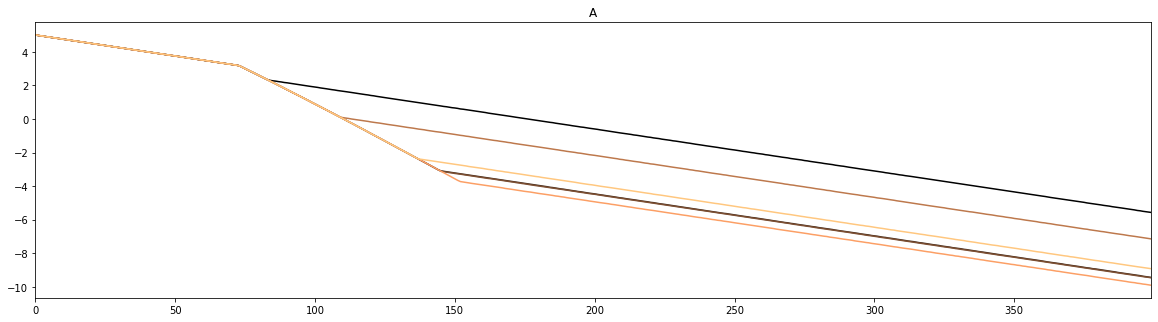

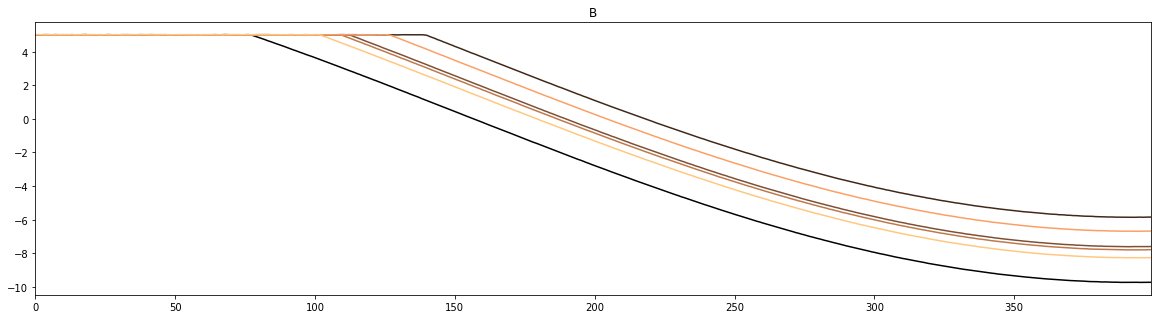

In [4]:
DF_ONLAP.iloc[2000:2400, 1:-2].plot(
    legend=False, figsize=(20, 10), cmap="copper"
).set_aspect(6)
plt.title("A")
DF.iloc[2000:2400, 1:-2].plot(legend=False, figsize=(20, 10), cmap="copper").set_aspect(
    6
)  # each x-section is 400 points long
plt.title("B")

# DF_horizontal.iloc[400:800, 0:-2].plot(legend=False, figsize=(20,10), cmap='copper').set_aspect(6)

## now let's grid the data using Verde and plot it up

In [5]:
%%capture
spline = vd.Spline()
spline.fit(
    (DF.iloc[2000:2400, -2] * 10, DF.iloc[2000:2400, -1] * 10),
    ANGULAR_THICKNESSES.iloc[2000:2400, 2] * 100,
)
AUIGRID = spline.grid(spacing=1, data_names=["thickness"])

Text(0.5, 1.0, 'Angular Unconformity Isochore')

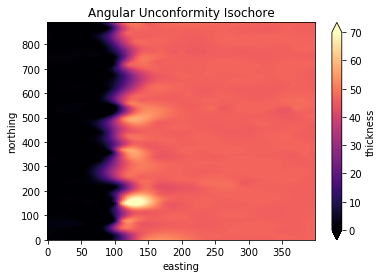

In [6]:
AUIGRID.thickness.plot.pcolormesh(cmap="magma", vmin=0, vmax=70)
plt.title("Angular Unconformity Thickness")

C:\Users\jrp4932\AppData\Local\Continuum\anaconda3\envs\machinelearning\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


Text(0.5, 1.0, 'Angular Unconformity Structure')

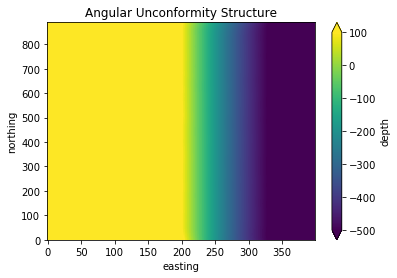

In [7]:
spline = vd.Spline()
spline.fit(
    (DF.iloc[2000:2400, -2] * 10, DF.iloc[2000:2400, -1] * 10),
    DF.iloc[2000:2400, 2] * 100,
)
AUSGRID = spline.grid(spacing=1, data_names=["depth"])
AUSGRID.depth.plot.pcolormesh(cmap="viridis", vmin=100, vmax=-500)
plt.title("Angular Unconformity Structure")

C:\Users\jrp4932\AppData\Local\Continuum\anaconda3\envs\machinelearning\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


Text(0.5, 1.0, 'Onlap Isochore')

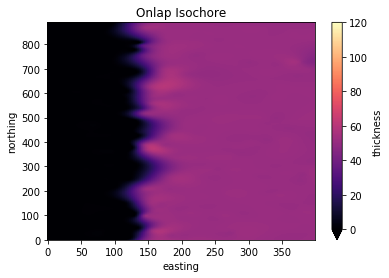

In [8]:
spline = vd.Spline()
spline.fit(
    (DF_ONLAP.iloc[2000:2400, -2] * 10, DF_ONLAP.iloc[2000:2400, -1] * 10),
    ONLAP_THICKNESSES.iloc[2000:2400, 3] * 100,
)
OLIGRID = spline.grid(spacing=1, data_names=["thickness"])
OLIGRID.thickness.plot.pcolormesh(cmap="magma", vmin=0, vmax=120)
plt.title("Onlap Isochore")

C:\Users\jrp4932\AppData\Local\Continuum\anaconda3\envs\machinelearning\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


Text(0.5, 1.0, 'Onlap Structure')

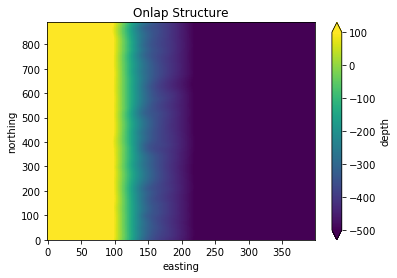

In [9]:
spline.fit(
    (DF_ONLAP.iloc[2000:2400, -2] * 10, DF_ONLAP.iloc[2000:2400, -1] * 10),
    DF_ONLAP.iloc[2000:2400, 3] * 100,
)
OLSGRID = spline.grid(spacing=1, data_names=["depth"])
OLSGRID.depth.plot.pcolormesh(cmap="viridis", vmin=100, vmax=-500)
plt.title("Onlap Structure")

### we can decimate the data to see what it would look like with fewer 'wells' in the cross section

In [10]:
DECIMATE_ONL = DF_ONLAP.iloc[2000:2400].sample(
    frac=0.9
)  # fraction is the percentage of the data you want to sample ie-0.9 means sample 90% of the data

Text(0.5, 1.0, 'A.')

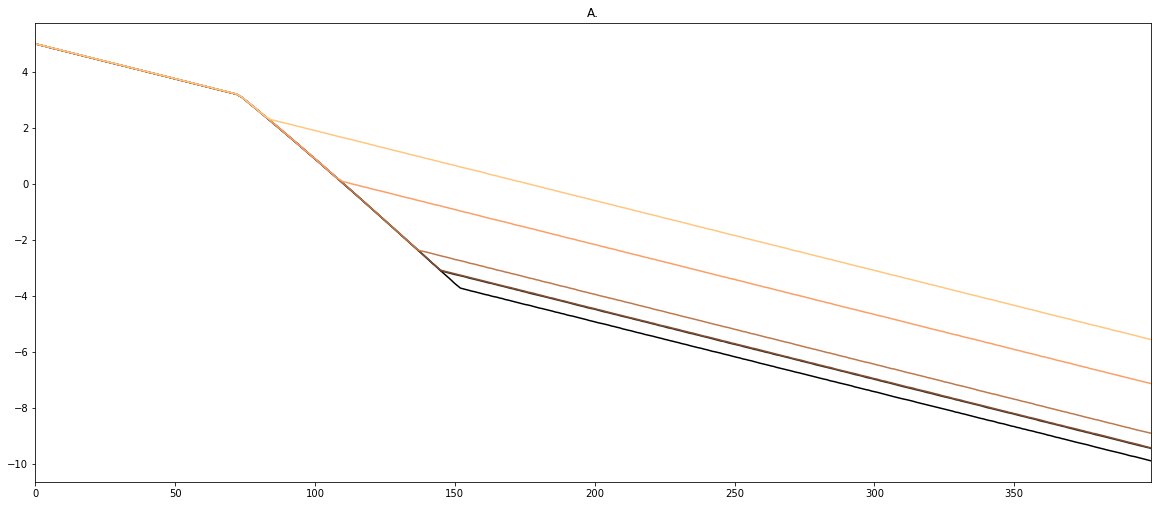

In [11]:
DEC = []
for i in range(len(DECIMATE_ONL)):
    DEC.append(DECIMATE_ONL.sort_index().iloc[i, 1:-2].sort_values()[0:6].values)
S2 = pd.DataFrame(DEC)
S2.index = DECIMATE_ONL.sort_index().index.values
S2.plot(legend=False, figsize=(20, 10), cmap="copper").set_aspect(10)
plt.title("A.")

In [12]:
DECIMATE_ANG = DF.iloc[2000:2400].loc[S2.diff(axis=1).index.values]

Text(0.5, 1.0, 'B.')

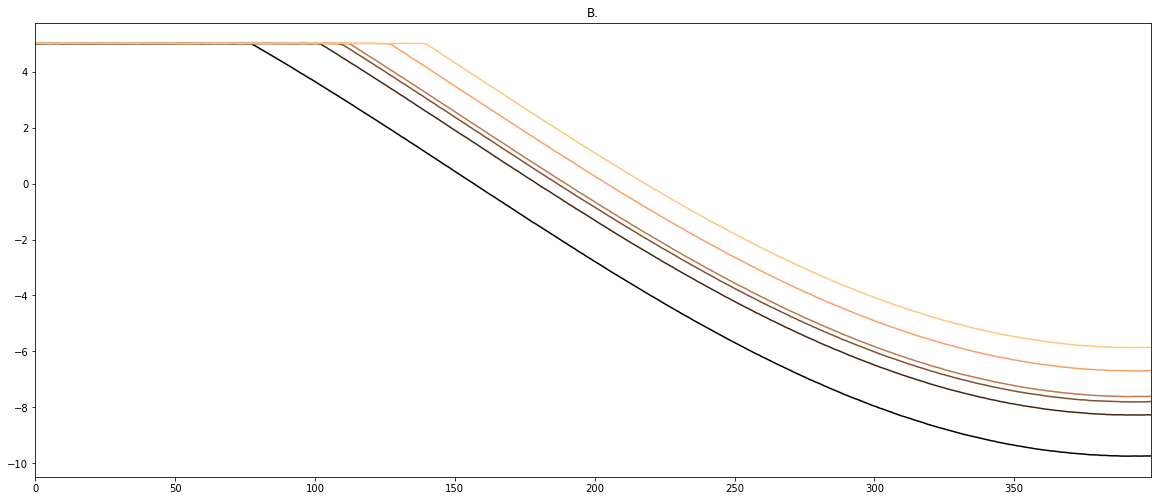

In [13]:
ADEC = []
for i in range(len(DECIMATE_ANG)):
    ADEC.append(DECIMATE_ANG.sort_index().iloc[i, 1:-2].sort_values()[0:6].values)
S3 = pd.DataFrame(ADEC)
S3.index = DECIMATE_ANG.sort_index().index.values
S3.plot(legend=False, figsize=(20, 10), cmap="copper").set_aspect(10)
plt.title("B.")

## And now we want to plot the structure map, thickness map, and cross sections for both

Text(0.5, 1.0, 'Cross Section')

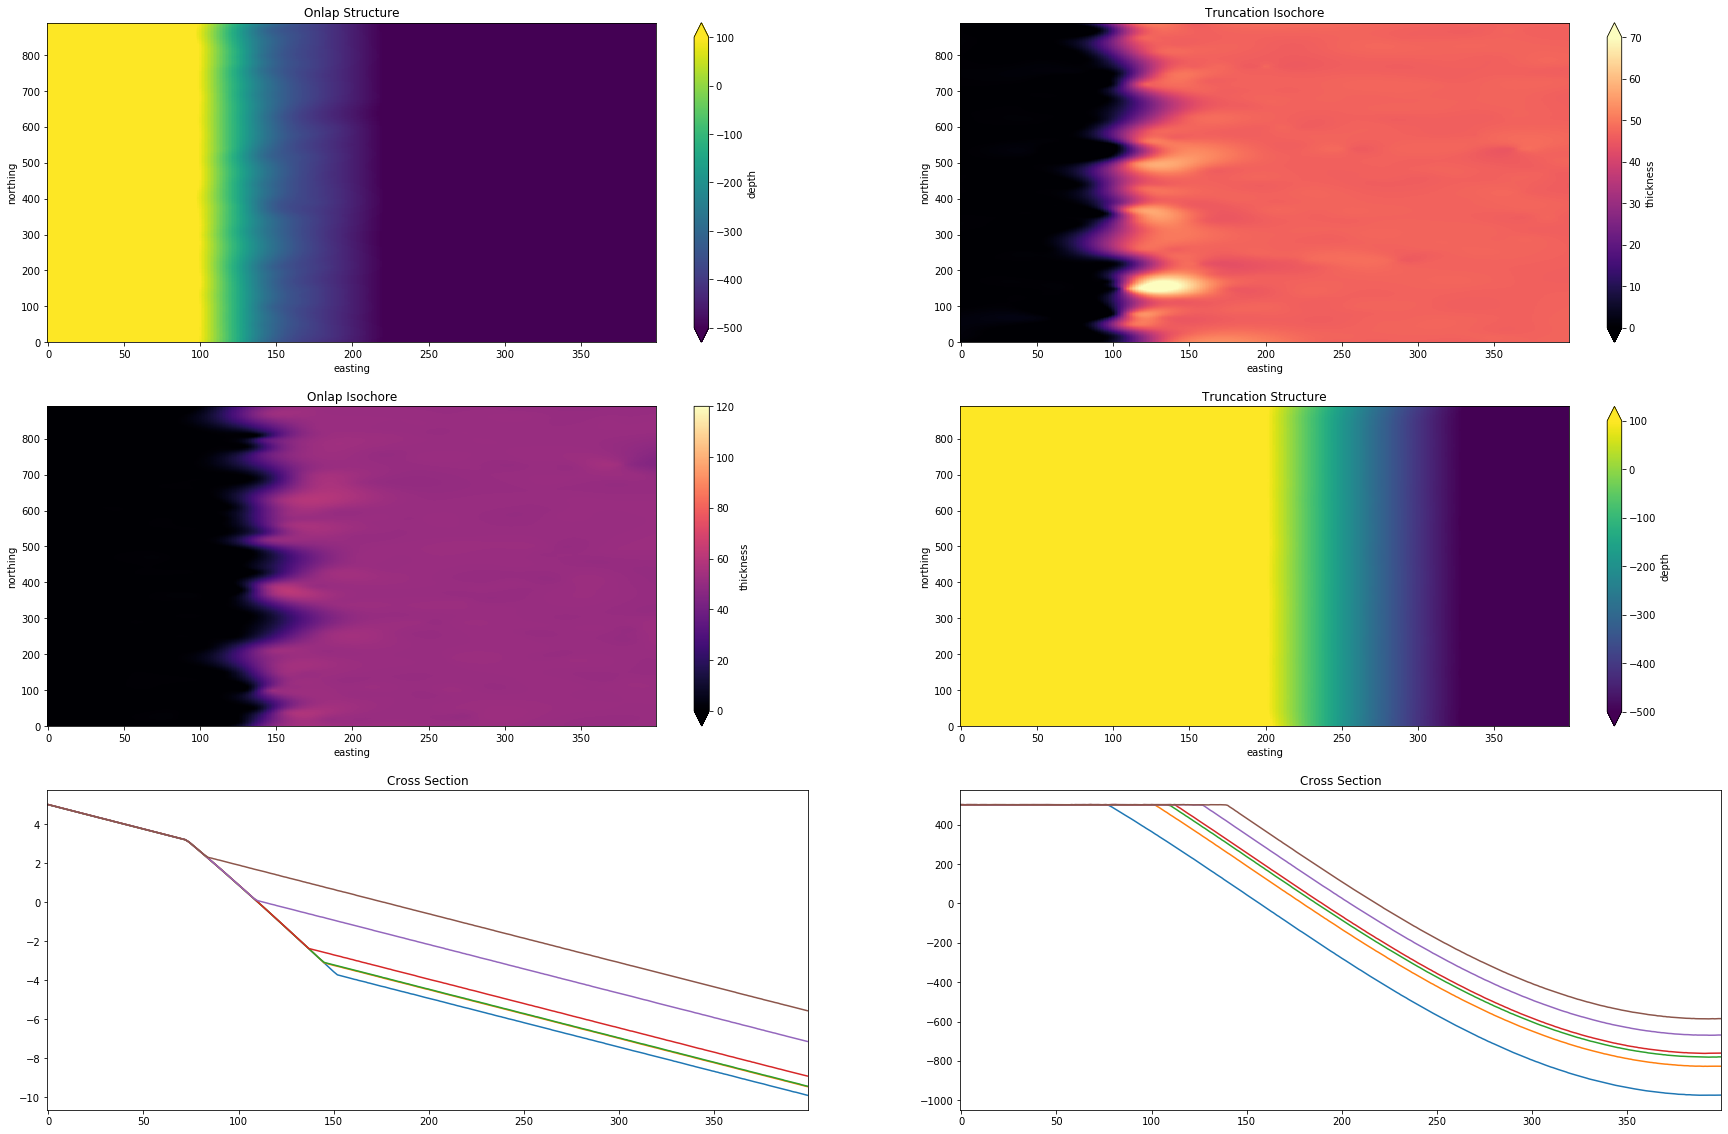

In [14]:
plt.figure(figsize=(30, 20))
ax1 = plt.subplot(321)
OLSGRID.depth.plot.pcolormesh(cmap="viridis", vmin=100, vmax=-500)
plt.title("Onlap Structure")


plt.subplot(322, sharex=ax1)
AUIGRID.thickness.plot.pcolormesh(cmap="magma", vmin=0, vmax=70)
plt.title("Truncation Thickness")


plt.subplot(323, sharex=ax1)
OLIGRID.thickness.plot.pcolormesh(cmap="magma", vmin=0, vmax=120)
plt.title("Onlap Thickness")

plt.subplot(324, sharex=ax1)
AUSGRID.depth.plot.pcolormesh(cmap="viridis", vmin=100, vmax=-500)
plt.title("Truncation Structure")

plt.subplot(325, sharex=ax1)
plt.plot(S2)
plt.title("Cross Section")

plt.subplot(326, sharex=ax1)
plt.plot(S3 * 100)
plt.title("Cross Section")

## Lastly let's make the plot look like it does in the paper in Figure 2

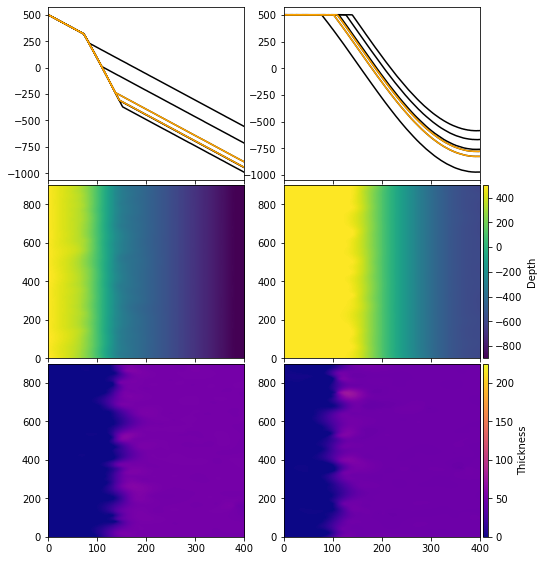

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, figsize=(20, 25))
fig.set_size_inches(7.5, 9.75)
fig.subplots_adjust(
    left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.03
)

axes[0, 0].plot(S2 * 100, c="black")
axes[0, 0].plot(S2[3] * 100, c="orange")
axes[0, 0].plot(S2[2] * 100, c="orange")

axes[0, 1].plot(S3 * 100, c="black")
axes[0, 1].plot(S3[2] * 100, c="orange")
axes[0, 1].plot(S3[1] * 100, c="orange")

im0 = axes[1, 0].imshow(
    OLSGRID.depth,
    extent=[0, 400, 0, 900],
    aspect="auto",
    cmap="viridis",
    vmin=-900,
    vmax=500,
)

im1 = axes[1, 1].imshow(
    AUSGRID.depth,
    extent=[0, 400, 0, 900],
    aspect="auto",
    cmap="viridis",
    vmin=-900,
    vmax=500,
)

im2 = axes[2, 0].imshow(
    OLIGRID.thickness,
    extent=[0, 400, 0, 900],
    aspect="auto",
    cmap="plasma",
    vmin=0,
    vmax=225,
)

im3 = axes[2, 1].imshow(
    AUIGRID.thickness,
    extent=[0, 400, 0, 900],
    aspect="auto",
    cmap="plasma",
    vmin=0,
    vmax=225,
)

fig.subplots_adjust(left=0.07, right=0.87)
# Add the colorbar outside...
box = axes[1, 1].get_position()
pad, width = 0.005, 0.01
cax = fig.add_axes([box.xmax + pad, box.ymin, width, box.height])
fig.colorbar(im0, cax=cax, label="Depth")

box = axes[2, 1].get_position()
pad, width = 0.005, 0.01
cax = fig.add_axes([box.xmax + pad, box.ymin, width, box.height])
fig.colorbar(im3, cax=cax, label="Thickness")

# fig.savefig('figure2.pDF')